## **Medicare Inpatient Hospitals-Data Cleaning and Pre-processing**

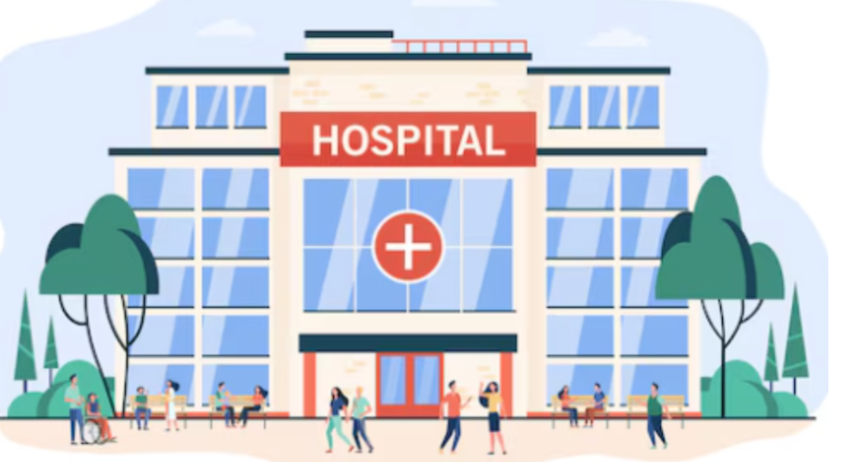

## Import Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Note: In order to suppress "SettingWithCopyWarning" warnings, ".loc" format is used extensively in this code

## Load and merge yearly datasets

In [6]:
# Path and CSVs list 
directory = '/Users/****' # local folder of csv files
subs = ['MUP_INP_RY24_P04_V10_DY17_Prv.CSV', 'MUP_INP_RY24_P04_V10_DY20_Prv.CSV', 'MUP_INP_RY24_P04_V10_DY18_Prv.CSV',
        'MUP_INP_RY24_P04_V10_DY21_Prv.CSV','MUP_INP_RY24_P04_V10_DY19_Prv.CSV', 'MUP_INP_RY24_P04_V10_DY22_Prv.CSV']

In [8]:
#Load, name and add year column to CSVs
sub_sets = []
for i in subs:
    cms = pd.read_csv(directory + "/" + i, encoding="ISO-8859-1")
    cms['source'] = i.split('_DY')[1][:2]  # Extract the two-digit year for temporary checking 
    cms['year'] = '20' + i.split('_DY')[1][:2]  # Convert to full year format
    cms['year'] = cms['year'].astype(int)  # Convert year values to integer  
    sub_sets.append(cms)

In [10]:
#Merge individual CSVs into 'ihp.csv' 
ihp = pd.concat(sub_sets, ignore_index=True) 

## Subsetting dataframe for analysis and renaming columns 

In [12]:
#List of columns
ihp.columns

Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_St',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Tot_Benes', 'Tot_Submtd_Cvrd_Chrg',
       'Tot_Pymt_Amt', 'Tot_Mdcr_Pymt_Amt', 'Tot_Dschrgs', 'Tot_Cvrd_Days',
       'Tot_Days', 'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt',
       'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt', 'Bene_Feml_Cnt',
       'Bene_Male_Cnt', 'Bene_Race_Wht_Cnt', 'Bene_Race_Black_Cnt',
       'Bene_Race_API_Cnt', 'Bene_Race_Hspnc_Cnt', 'Bene_Race_NatInd_Cnt',
       'Bene_Race_Othr_Cnt', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt',
       'Bene_CC_BH_ADHD_OthCD_V1_Pct', 'Bene_CC_BH_Alcohol_Drug_V1_Pct',
       'Bene_CC_BH_Tobacco_V1_Pct', 'Bene_CC_BH_Alz_NonAlzdem_V2_Pct',
       'Bene_CC_BH_Anxiety_V1_Pct', 'Bene_CC_BH_Bipolar_V1_Pct',
       'Bene_CC_BH_Mood_V2_Pct', 'Bene_CC_BH_Depress_V1_Pct',
       'Bene_CC_BH_PD_V1_

In [14]:
#List of selected columns to keep
cols = ['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_St',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Tot_Benes', 'Tot_Submtd_Cvrd_Chrg',
       'Tot_Pymt_Amt', 'Tot_Mdcr_Pymt_Amt', 'Tot_Dschrgs',
       'Tot_Days', 'Bene_Avg_Age','Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt',
       'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt', 'Bene_Feml_Cnt',
       'Bene_Male_Cnt','year'] 

In [16]:
#Subset dataframe using selected columns
ihp_df = ihp[cols] 

In [18]:
#Set of column names
cols = ['Provider_Code','Provider_Name','Street','City','Zip5','State','State_FIPS',
        'RUCA_Code','RUCA_Desc','Total_Benef','Submitted_Covered','Total_Payment', 
        'Medicare_Payment','Total_Discharge','Total_Days','AVG_Age','Age_lt_65',
        'Age_65_74','Age_75_84','Age_gt_84','Female', 'Male','Year'] 

In [20]:
#Rename columns 
ihp_df= ihp_df.set_axis(labels=cols, axis=1)

## Merging with hospitals dataset to add three more columns

In [22]:
hospitals = pd.read_csv('Hospitals.csv')

In [24]:
# Remove leading zeros from 'Facility ID' in hospitals dataframe
hospitals['Facility ID'] = hospitals['Facility ID'].astype(str).str.lstrip('0')

In [26]:
# Select relevant columns from the second dataframe
hospital_selected = hospitals[['Facility ID','Hospital Type', 'Hospital Ownership', 'Hospital overall rating']]

In [28]:
ihp_df['Provider_Code'] = ihp_df['Provider_Code'].astype(str)

In [30]:
hospital_selected = hospital_selected.rename(columns={'Facility ID': 'Provider_Code'})

In [32]:
# Merge with the main dataframe
ihp_df = pd.merge(ihp_df, hospital_selected, 
                          on='Provider_Code', 
                          how='left')

## General overview

In [34]:
# Get dataset shape
print(f"Dataset contains {ihp_df.shape[0]} rows and {ihp_df.shape[1]} columns.")

Dataset contains 19114 rows and 26 columns.


In [36]:
# Display column names
print("Columns in dataset:", ihp_df.columns.tolist())

Columns in dataset: ['Provider_Code', 'Provider_Name', 'Street', 'City', 'Zip5', 'State', 'State_FIPS', 'RUCA_Code', 'RUCA_Desc', 'Total_Benef', 'Submitted_Covered', 'Total_Payment', 'Medicare_Payment', 'Total_Discharge', 'Total_Days', 'AVG_Age', 'Age_lt_65', 'Age_65_74', 'Age_75_84', 'Age_gt_84', 'Female', 'Male', 'Year', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating']


In [38]:
# Rename imported columns
ihp_df.rename(columns={'Hospital Type':'Hosp_Type', 'Hospital Ownership':'Hosp_Own', 
                       'Hospital overall rating':'Hosp_Rating'}, inplace=True)

In [40]:
# Display summary of dataset
ihp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19114 entries, 0 to 19113
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Provider_Code      19114 non-null  object 
 1   Provider_Name      19114 non-null  object 
 2   Street             19114 non-null  object 
 3   City               19114 non-null  object 
 4   Zip5               19114 non-null  int64  
 5   State              19114 non-null  object 
 6   State_FIPS         19114 non-null  int64  
 7   RUCA_Code          19107 non-null  float64
 8   RUCA_Desc          19107 non-null  object 
 9   Total_Benef        19102 non-null  float64
 10  Submitted_Covered  19102 non-null  float64
 11  Total_Payment      19102 non-null  float64
 12  Medicare_Payment   19102 non-null  float64
 13  Total_Discharge    19114 non-null  int64  
 14  Total_Days         19102 non-null  float64
 15  AVG_Age            19102 non-null  float64
 16  Age_lt_65          180

## Handling missing values

In [42]:
# Cleaning strings
string_cols = ['Provider_Name', 'Street', 'City', 'State', 'RUCA_Desc', 'Hosp_Type', 'Hosp_Own', 
               'Provider_Code', 'Zip5', 'State_FIPS']

In [44]:
for col in string_cols:
    ihp_df[col] = ihp_df[col].astype(str).str.strip().replace("nan", np.nan).str.replace(r'\s+', ' ', regex=True).str.title()

In [46]:
# Count missing values per column
missing_values = ihp_df.isnull().sum()
print(missing_values[missing_values > 0])

RUCA_Code               7
RUCA_Desc               7
Total_Benef            12
Submitted_Covered      12
Total_Payment          12
Medicare_Payment       12
Total_Days             12
AVG_Age                12
Age_lt_65            1096
Age_65_74             243
Age_75_84             392
Age_gt_84            1208
Female                237
Male                  237
Hosp_Type            1178
Hosp_Own             1178
Hosp_Rating          1178
dtype: int64


<Axes: >

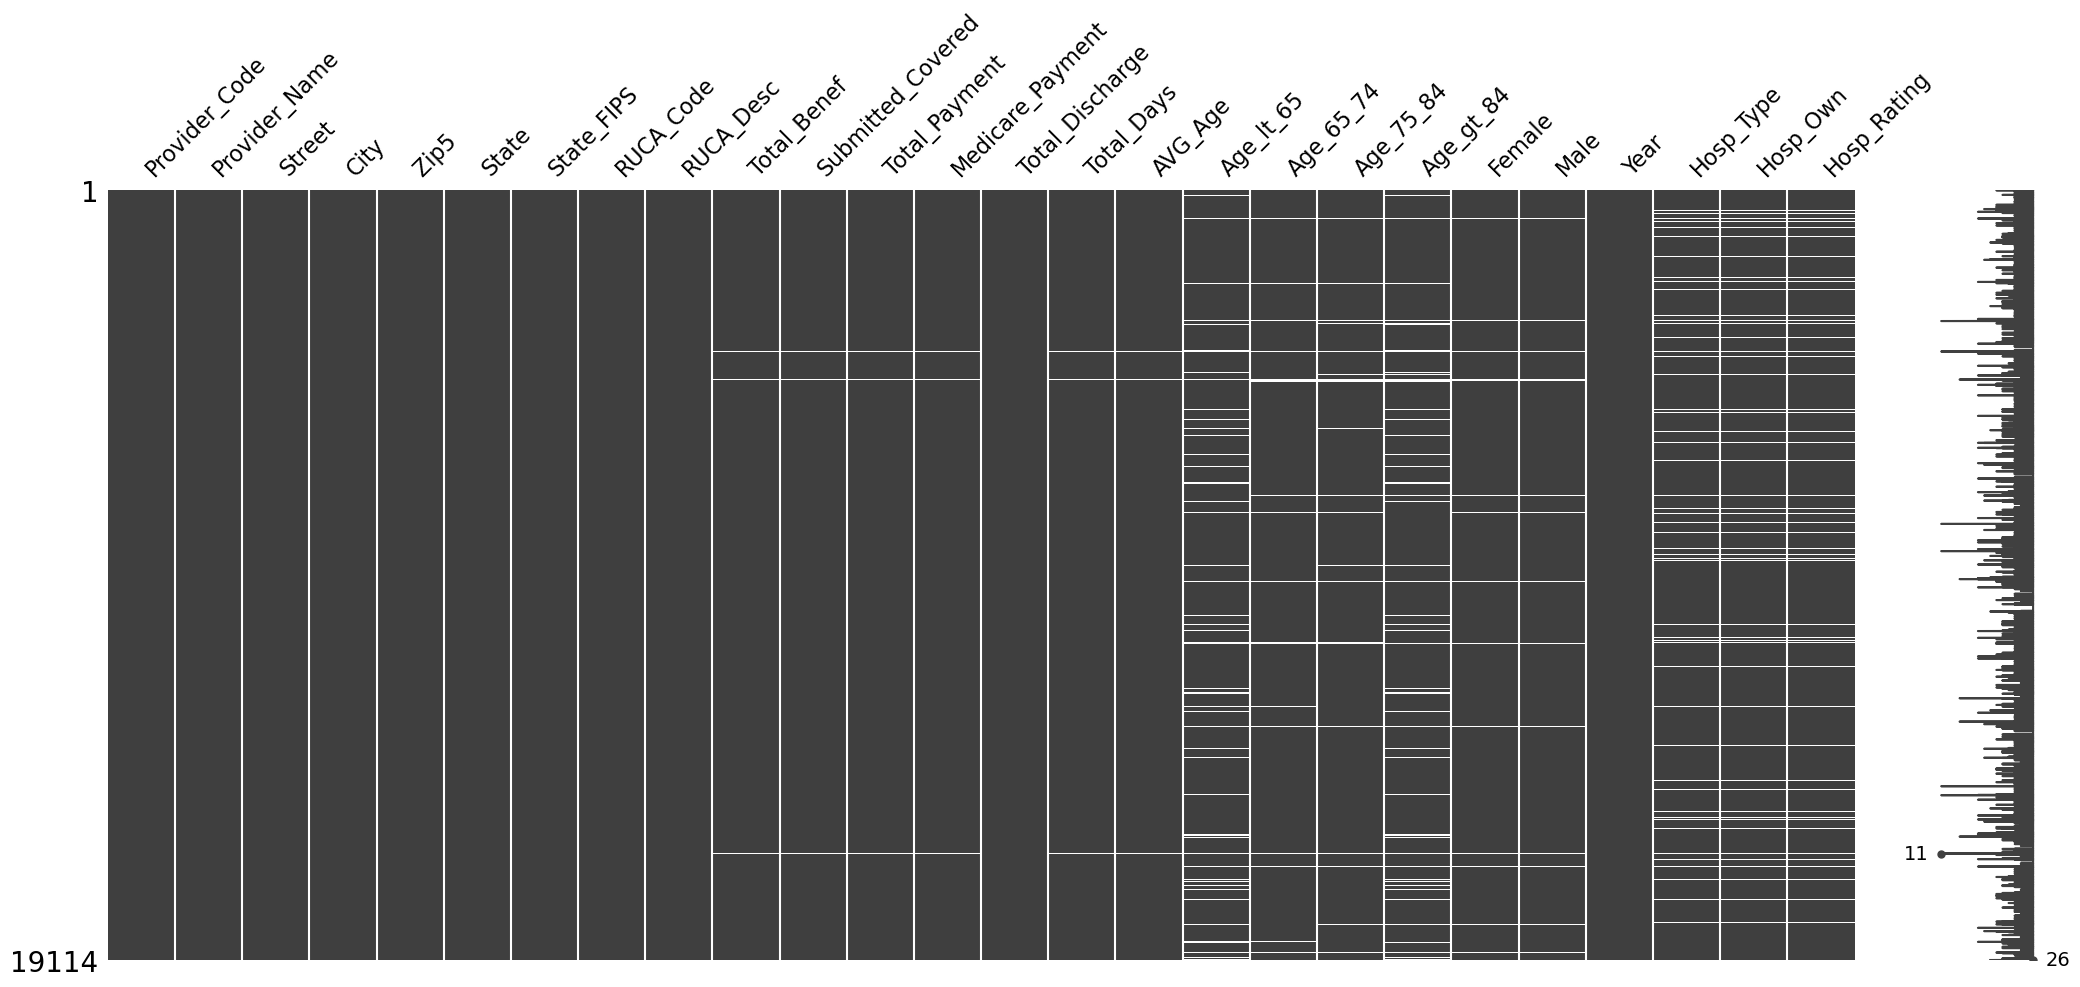

In [48]:
# Visualise missing values to detect patters
msno.matrix(ihp_df)

In [50]:
# Checking rows with missing values for selected columns 
ihp_df.loc[
    ihp_df.Submitted_Covered.isnull() &
    ihp_df.Total_Benef.isnull() & 
    ihp_df.Total_Payment.isnull() & 
    ihp_df.Medicare_Payment.isnull() &
    ihp_df.AVG_Age.isnull() &
    ihp_df.Total_Days.isnull()
    ] # There are 12 rows with missing values for almost all key columns

,Provider_Code,Provider_Name,Street,City,Zip5,State,State_FIPS,RUCA_Code,RUCA_Desc,Total_Benef,...,Age_lt_65,Age_65_74,Age_75_84,Age_gt_84,Female,Male,Year,Hosp_Type,Hosp_Own,Hosp_Rating
3252,670117,Texas General Hospital- Vzrmc Lp,707 N Waldrip St,Grand Saline,75140,Tx,48,7.0,Small Town Core: Primary Flow Within An Urban ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN
4008,110026,Elbert Memorial Hospital,4 Medical Drive,Elberton,30635,Ga,13,10.0,Rural Areas: Primary Flow To A Tract Outside A...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN
4704,230078,Lakeland Hospital Watervliet,400 Medical Park Dr,Watervliet,49098,Mi,26,2.0,Metropolitan Area High Commuting: Primary Flow...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,Acute Care Hospitals,Voluntary Non-Profit - Private,Not Available
8288,320070,Dhhs Usphs Indian Health Services,Exit #102 Off I-40 1/2 Mile South,San Fidel,87049,Nm,35,5.0,Micropolitan High Commuting: Primary Flow 30% ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN
8963,420057,Mcleod Medical Center - Darlington,701 Cashua Ferry Road,Darlington,29540,Sc,45,1.0,Metropolitan Area Core: Primary Flow Within An...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN
9658,670121,Saint Camillus Medical Center,1612 Hurst Town Center Drive,Hurst,76054,Tx,48,1.0,Metropolitan Area Core: Primary Flow Within An...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,Acute Care Hospitals,Proprietary,Not Available
12615,500052,Kaiser Permanente Central Hospital,201 - 16Th Avenue East,Seattle,98112,Wa,53,1.0,Metropolitan Area Core: Primary Flow Within An...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,Acute Care Hospitals,Voluntary Non-Profit - Other,Not Available
13195,50546,Porterville Developmental Center,26501 Avenue 140,Porterville,93257,Ca,6,1.0,Metropolitan Area Core: Primary Flow Within An...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acute Care Hospitals,Government - State,Not Available
14799,330409,The Burdett Care Center,2215 Burdett Ave,Troy,12180,Ny,36,1.0,Metropolitan Area Core: Primary Flow Within An...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN
15022,370011,Mercy Hospital El Reno,2115 Parkview Drive,El Reno,73036,Ok,40,4.1,Secondary Flow 30% To <50% To A Urbanized Area...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN


In [52]:
# List of key columns to find candidate rows to be removed (first set)
columns_to_check = ['Submitted_Covered', 'Total_Benef', 'Total_Payment', 
                    'Medicare_Payment', 'AVG_Age', 'Total_Days']

In [54]:
# Remove rows with missing values for selected columns (first set)
ihp_df = ihp_df.dropna(subset=columns_to_check, how='all')

In [56]:
# Check if all age group columns are missing (NaN) (first age condition)
all_age_missing = ihp_df[['Age_lt_65', 'Age_65_74', 'Age_75_84', 'Age_gt_84']].isnull().all(axis=1)

In [58]:
# Calculate the sum of available age group values (filling NaN with 0 to avoid errors)(second age condition)
ihp_df.loc[:, "Age_Sum"] = ihp_df[['Age_lt_65', 'Age_65_74', 'Age_75_84', 'Age_gt_84']].sum(axis=1, skipna=True)

In [60]:
# Check if the sum of age groups is not equal to Total_Benef
age_sum_mismatch = ihp_df['Age_Sum'] != ihp_df['Total_Benef']

In [62]:
# Remove rows that satisfy both conditions above
ihp_df1= ihp_df[~(all_age_missing & age_sum_mismatch)]

In [64]:
# Predicting Missing Age Group Values When One Age Group is Missing
def impute_missing_age_group(df):
    age_cols = ['Age_lt_65', 'Age_65_74', 'Age_75_84', 'Age_gt_84']

    for index, row in df.iterrows():
        missing_cols = row[age_cols].isnull()
        
        # If exactly one age group is missing
        if missing_cols.sum() == 1:
            known_sum = row[age_cols].sum(skipna=True)  # Sum of available age groups
            missing_col = missing_cols[missing_cols].index[0]  # Get the missing column name
            df.at[index, missing_col] = row['Total_Benef'] - known_sum  # Impute missing value
    return df

In [66]:
# Apply function 
ihp_df2= impute_missing_age_group(ihp_df1)

In [68]:
# Handle missing values of 'Male' and 'Female' columns
ihp_df2 = ihp_df2.dropna(subset=['Female', 'Male'])

In [70]:
# Handle missing values of 'Hosp_Type' column
ihp_df2.loc[:,'Hosp_Type'] = ihp_df2['Hosp_Type'].fillna(ihp_df2['Hosp_Type'].mode()[0])

In [72]:
# Handle missing values of 'Hosp_Rating' column
ihp_df2.loc[:, 'Hosp_Rating'] = ihp_df2['Hosp_Rating'].replace('Not Available', pd.NA)
ihp_df2.loc[:,'Hosp_Rating'] = ihp_df2['Hosp_Rating'].fillna(ihp_df2['Hosp_Rating'].mode()[0])

In [74]:
# Replace missing values of "Hosp_Own" column with 'Unknown'
ihp_df2.loc[:,'Hosp_Own'] = ihp_df2['Hosp_Own'].fillna('Unknown')

<Axes: >

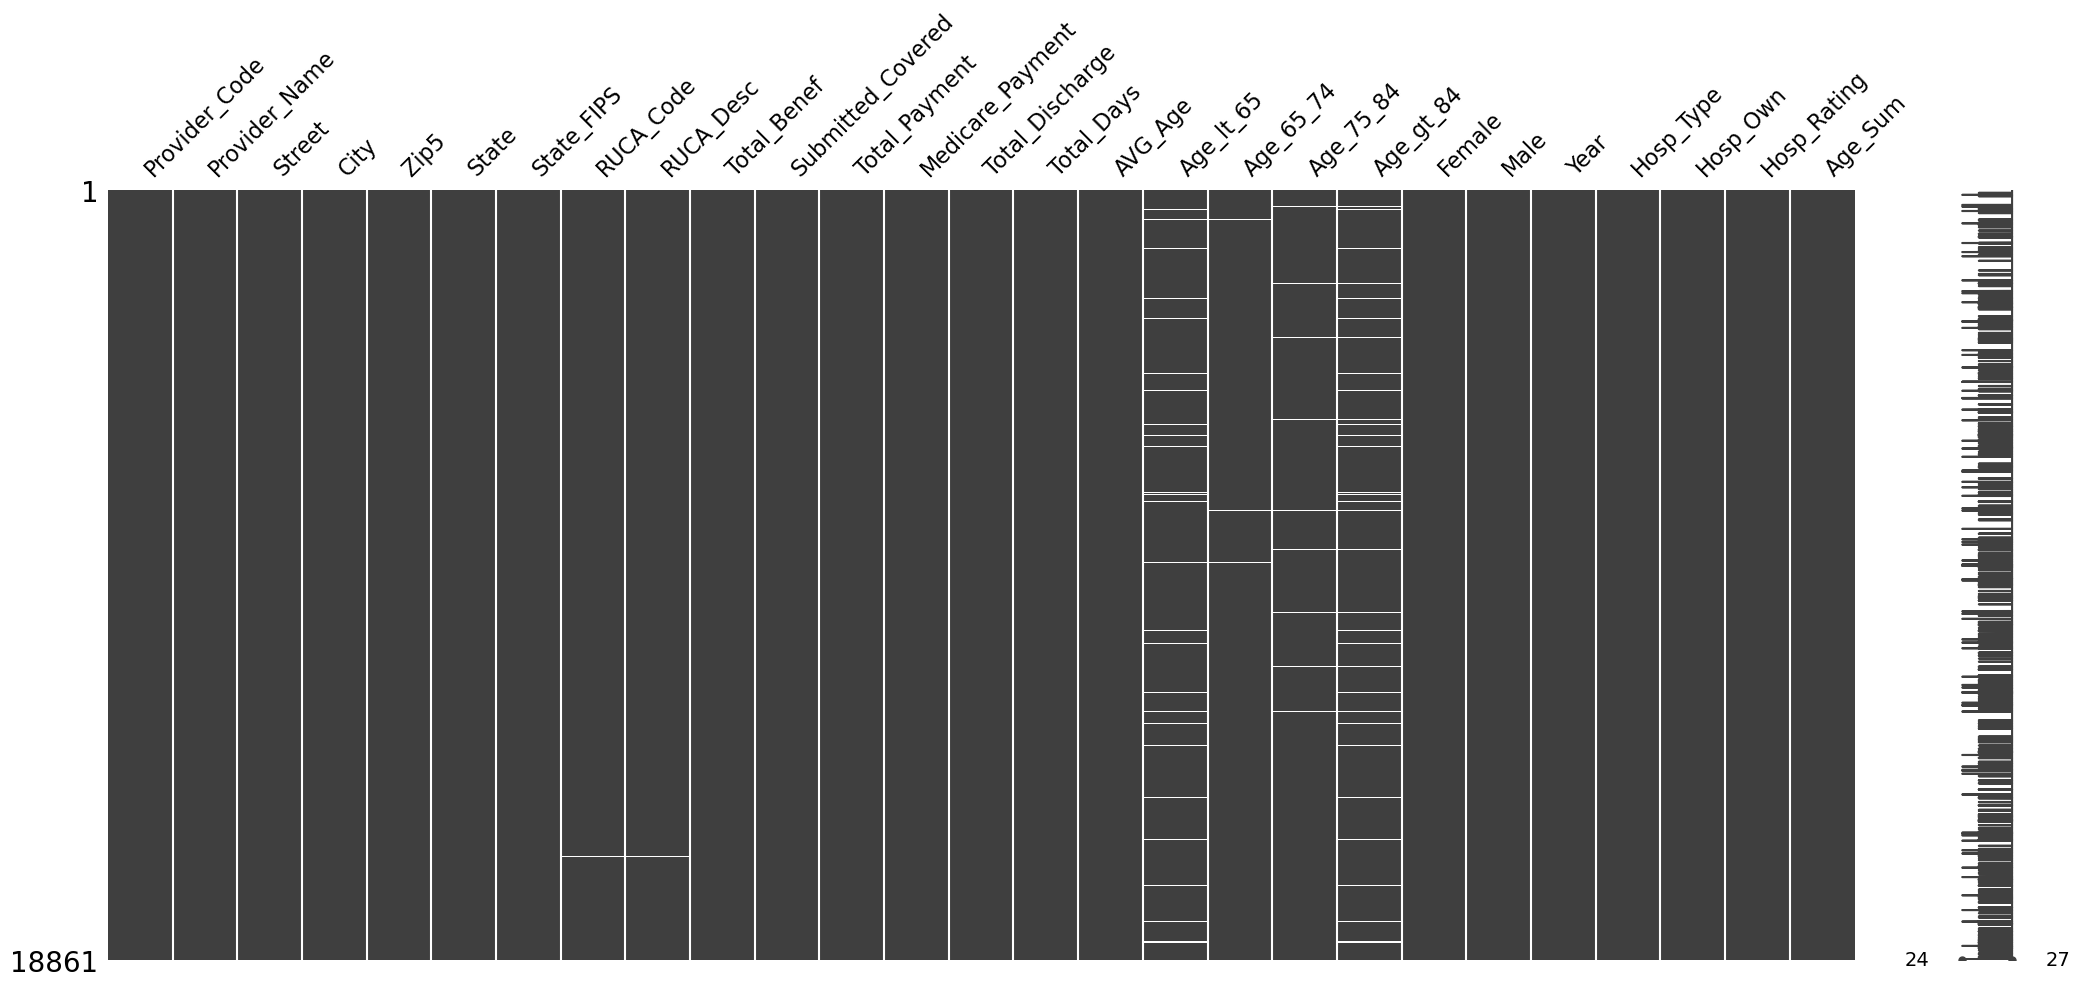

In [76]:
# Check missing values pattern again
msno.matrix(ihp_df2)

## Handle duplicates

In [78]:
# Check for duplicates
duplicates = ihp_df2.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Handle data types

In [80]:
ihp_df3 = ihp_df2.copy()

In [82]:
ihp_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18861 entries, 0 to 19111
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Provider_Code      18861 non-null  object 
 1   Provider_Name      18861 non-null  object 
 2   Street             18861 non-null  object 
 3   City               18861 non-null  object 
 4   Zip5               18861 non-null  object 
 5   State              18861 non-null  object 
 6   State_FIPS         18861 non-null  object 
 7   RUCA_Code          18854 non-null  float64
 8   RUCA_Desc          18854 non-null  object 
 9   Total_Benef        18861 non-null  float64
 10  Submitted_Covered  18861 non-null  float64
 11  Total_Payment      18861 non-null  float64
 12  Medicare_Payment   18861 non-null  float64
 13  Total_Discharge    18861 non-null  int64  
 14  Total_Days         18861 non-null  float64
 15  AVG_Age            18861 non-null  float64
 16  Age_lt_65          17969 no

In [84]:
# Convert numeric identifiers
ihp_df3.loc[:,'Provider_Code'] = ihp_df3['Provider_Code'].astype(str)  

In [86]:
ihp_df3.loc[:,'Zip5'] = ihp_df3['Zip5'].astype(str)  

In [88]:
ihp_df3.loc[:,'State_FIPS'] = ihp_df3['State_FIPS'].astype(str)  

In [90]:
# Convert categorical columns (text-based)
cat_cols = ['Provider_Name', 'Street', 'City', 'State', 'RUCA_Desc', 'Hosp_Type', 'Hosp_Own']  

In [92]:
ihp_df3[cat_cols] = ihp_df3[cat_cols].astype('category')  

In [94]:
# Convert whole numbers to integers
int_cols = ['Total_Benef', 'Total_Discharge','Total_Days', 'Age_lt_65', 'Age_65_74', 
            'Age_75_84', 'Age_gt_84', 'RUCA_Code', 'Female', 'Male']

In [96]:
ihp_df3[int_cols] = ihp_df3[int_cols].fillna(0).astype(int)

In [98]:
ihp_df3['Hosp_Rating'] = ihp_df3['Hosp_Rating'].astype(int)  

In [100]:
# Convert remaining numerical columns 
num_cols = ['Submitted_Covered', 'Total_Payment', 
            'Medicare_Payment', 'AVG_Age', 'Hosp_Rating']

In [102]:
ihp_df3.loc[:,num_cols] = ihp_df3[num_cols].apply(pd.to_numeric, errors="coerce")  # Ensures correct numeric format
ihp_df3.loc[:,num_cols] = ihp_df3[num_cols].round(1)

### Handle outliers

In [104]:
# Define the columns to check for outliers
outlier_cols = ['Total_Benef', 'Submitted_Covered', 'Total_Payment', 'Medicare_Payment',
                'Total_Discharge', 'Total_Days']

In [106]:
# Detect outliers using function based on IQR methd (better choice when data is not normally distributed)
def detect_outliers_iqr(df, cols, multiplier=1.5):
    outlier_dict = {}
    
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = outliers.shape[0]

        print(f"{col}: {outliers.shape[0]} outliers detected")
    
    return outlier_dict

outlier_counts = detect_outliers_iqr(ihp_df3, outlier_cols, multiplier=1.5)


Total_Benef: 976 outliers detected
Submitted_Covered: 1533 outliers detected
Total_Payment: 1431 outliers detected
Medicare_Payment: 1403 outliers detected
Total_Discharge: 979 outliers detected
Total_Days: 1177 outliers detected


In [108]:
# Function to remove outliers using IQR with a given multiplier

def remove_outliers_iqr(df, columns, multiplier=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (multiplier * IQR)
        upper_bound = Q3 + (multiplier * IQR)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply function 
ihp_df4 = remove_outliers_iqr(ihp_df3, outlier_cols, multiplier=2.5) # To retain more data and only remove extreme outliers

print(f"Original dataset: {len(ihp_df3)} rows")
print(f"After IQR 2.5: {len(ihp_df4)} rows (Removed: {len(ihp_df3) - len(ihp_df4)})")

Original dataset: 18861 rows
After IQR 2.5: 17396 rows (Removed: 1465)


## Adding some more useful columns

In [112]:
# Age group insights
ihp_df3.loc[:,'Pct_Age_lt_65'] = (ihp_df3['Age_lt_65'] / ihp_df3['Total_Benef']) * 100
ihp_df3.loc[:,'Pct_Age_65_74'] = (ihp_df3['Age_65_74'] / ihp_df3['Total_Benef']) * 100
ihp_df3.loc[:,'Pct_Age_75_84'] = (ihp_df3['Age_75_84'] / ihp_df3['Total_Benef']) * 100
ihp_df3.loc[:,'Pct_Age_gt_84'] = (ihp_df3['Age_gt_84'] / ihp_df3['Total_Benef']) * 100
ihp_df3.loc[:,'Dominant_Age_Group'] = ihp_df3[['Age_lt_65', 'Age_65_74', 'Age_75_84', 'Age_gt_84']].idxmax(axis=1)

In [114]:
# Gender insights
ihp_df3.loc[:,'Elderly_Pct'] = (ihp_df3['Age_65_74'] + ihp_df3['Age_75_84'] + ihp_df3['Age_gt_84']) / ihp_df3['Total_Benef']
ihp_df3.loc[:,'Female_to_Male_Ratio'] = ihp_df3['Female'] / (ihp_df3['Male'])
ihp_df3.loc[:,'Pct_Female'] = (ihp_df3['Female'] / ihp_df3['Total_Benef']) * 100
ihp_df3.loc[:,'Pct_Male'] = (ihp_df3['Male'] / ihp_df3['Total_Benef']) * 100

In [116]:
# Hospital performance & financial metrics
ihp_df3.loc[:,'Avg_Payment_Per_Benef'] = ihp_df3['Total_Payment'] / ihp_df3['Total_Benef']
ihp_df3.loc[:,'Avg_Payment_per_Discharge'] = ihp_df3['Total_Payment'] / ihp_df3['Total_Discharge']
ihp_df3.loc[:,'Revenue_per_Day'] = ihp_df3['Total_Payment'] / ihp_df3['Total_Days']
ihp_df3.loc[:,'Pct_Medicare_Payment'] = (ihp_df3['Medicare_Payment'] / ihp_df3['Total_Payment']) * 100
ihp_df3.loc[:,'Avg_Length_of_Stay'] = ihp_df3['Total_Days'] / ihp_df3['Total_Discharge']
ihp_df3.loc[:,'Discharge_Ratio'] = ihp_df3['Total_Discharge'] / ihp_df3['Total_Benef']

In [118]:
# Location-based insights
ihp_df3.loc[:,'Urban_Rural'] = ihp_df2['RUCA_Code'].apply(lambda x: 'Urban' if x < 4 else 'Rural')

In [120]:
# Temporal analysis
ihp_df3.loc[:,'Covid_Era'] = ihp_df2['Year'].apply(lambda x: 'Pre-COVID' if x < 2020 else 'Post-COVID')

## Saving file

In [122]:
ihp_df4 = round(ihp_df3, 1)

In [124]:
ihp_df4.head()

,Provider_Code,Provider_Name,Street,City,Zip5,State,State_FIPS,RUCA_Code,RUCA_Desc,Total_Benef,...,Pct_Female,Pct_Male,Avg_Payment_Per_Benef,Avg_Payment_per_Discharge,Revenue_per_Day,Pct_Medicare_Payment,Avg_Length_of_Stay,Discharge_Ratio,Urban_Rural,Covid_Era
0,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,36301,Al,1,1,Metropolitan Area Core: Primary Flow Within An...,5560,...,52.8,47.2,13985.5,9927.2,1876.4,86.5,5.3,1.4,Urban,Pre-COVID
1,10005,Marshall Medical Center South,2505 U S Highway 431 North,Boaz,35957,Al,1,4,Micropolitan Area Core: Primary Flow Within An...,2576,...,58.1,41.9,10095.0,7524.5,1487.6,82.8,5.1,1.3,Rural,Pre-COVID
2,10006,Eliza Coffee Memorial Hospital,205 Marengo Street,Florence,35631,Al,1,1,Metropolitan Area Core: Primary Flow Within An...,3899,...,53.5,46.5,11865.7,8562.7,1625.2,84.9,5.3,1.4,Urban,Pre-COVID
3,10007,Mizell Memorial Hospital,702 N Main St,Opp,36467,Al,1,7,Small Town Core: Primary Flow Within An Urban ...,463,...,57.0,43.0,8429.3,5958.4,1486.8,84.8,4.0,1.4,Rural,Pre-COVID
4,10008,Crenshaw Community Hospital,101 Hospital Circle,Luverne,36049,Al,1,3,Metropolitan Area Low Commuting: Primary Flow ...,149,...,60.4,39.6,8841.5,6933.6,1832.2,82.8,3.8,1.3,Urban,Pre-COVID


In [128]:
ihp_df4.to_csv('/*****/cms.csv')